# PCA Demo

Original source from: 

  https://www.kaggle.com/mirzarahim/introduction-to-pca-image-compression-example

image shape=(512, 512, 3)
OK


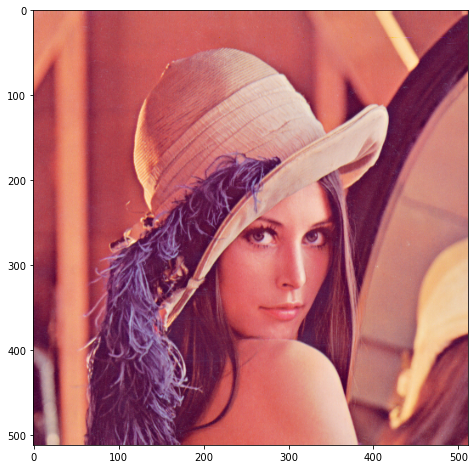

In [3]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

image_raw = imread("../../L07/Extra/lenna.png")
print(f"image shape={image_raw.shape}")

# Displaying the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)

print("OK")

image sum=(512, 512)
image max value=1.0
OK


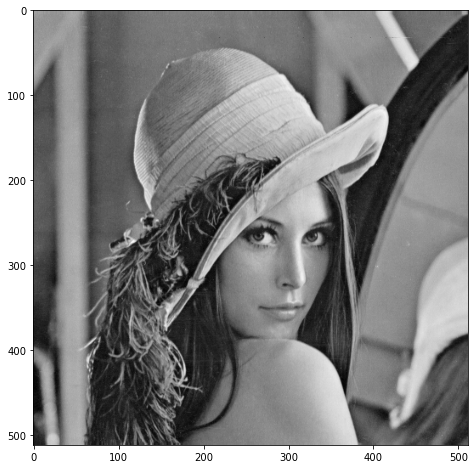

In [4]:
image_sum = image_raw.sum(axis=2)
print(f"image sum={image_sum.shape}")

image_bw = image_sum/image_sum.max()

print(f"image max value={image_bw.max()}")

plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

print("OK")

Number of components explaining 95% variance: 40
  => found k=40, OK


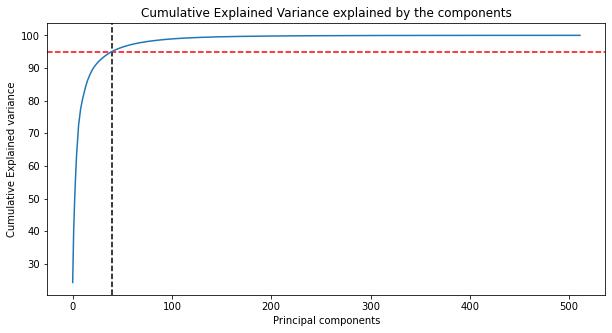

In [5]:
from sklearn.decomposition import PCA, IncrementalPCA

pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

print(f"  => found k={k}, OK")

k=40, OK


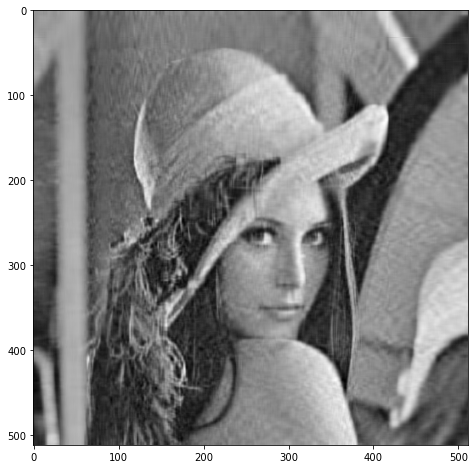

In [14]:
k=40
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

print(f"k={k}, OK")